-----

In [1]:
import functions as f
import pandas as pd
import numpy as np

### Import From MySQL

------

In [2]:
thp_data=pd.read_sql('SELECT * FROM thp_data;', f.connection)
confort_thp=pd.read_sql('SELECT * FROM confort_thp;', f.connection)
contact_thp=pd.read_sql('SELECT * FROM contact_thp;', f.connection)
presence_thp=pd.read_sql('SELECT * FROM presence_thp;', f.connection)

## thp_data

In [3]:
f.thp_data_clean(thp_data)
thp_data.isna().sum()

tenant_id    0
in_temp      0
out_temp     0
in_hum       0
out_hum      0
in_pre       0
out_pre      0
hour         0
date         0
dtype: int64

In [4]:
thp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128472 entries, 0 to 128471
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   tenant_id  128472 non-null  int64         
 1   in_temp    128472 non-null  float64       
 2   out_temp   128472 non-null  float64       
 3   in_hum     128472 non-null  float64       
 4   out_hum    128472 non-null  float64       
 5   in_pre     128472 non-null  float64       
 6   out_pre    128472 non-null  float64       
 7   hour       128472 non-null  int64         
 8   date       128472 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 8.8 MB


In [5]:
thp_data

,tenant_id,in_temp,out_temp,in_hum,out_hum,in_pre,out_pre,hour,date
0,0,19.76,24.6,68.75,57.0,1003.0,1020.9,14,2019-10-06
1,0,19.80,24.6,68.75,57.0,1003.0,1020.9,14,2019-10-06
2,0,19.80,24.6,68.29,57.0,1003.0,1020.9,14,2019-10-06
3,0,19.80,24.6,68.29,57.0,1003.0,1020.9,14,2019-10-06
4,0,19.80,24.6,69.05,57.0,1003.0,1020.9,14,2019-10-06
...,...,...,...,...,...,...,...,...,...
128467,6,25.22,14.3,67.69,96.0,1013.0,1023.3,13,2019-12-13
128468,6,21.01,14.3,67.01,96.0,1001.9,1023.3,13,2019-12-13
128469,6,20.85,14.3,65.65,96.0,1001.0,1023.3,13,2019-12-13
128470,6,20.85,14.3,65.65,96.0,1002.0,1023.3,13,2019-12-13


## confort_thp

In [6]:
confort_thp.isna().sum()

tenant_id    0
feedback     0
in_temp      0
in_hum       0
in_pre       0
out_temp     0
out_hum      0
out_pre      0
hour         0
date         0
dtype: int64

In [7]:
confort_thp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1362 entries, 0 to 1361
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tenant_id  1362 non-null   int64  
 1   feedback   1362 non-null   object 
 2   in_temp    1362 non-null   float64
 3   in_hum     1362 non-null   float64
 4   in_pre     1362 non-null   float64
 5   out_temp   1362 non-null   float64
 6   out_hum    1362 non-null   float64
 7   out_pre    1362 non-null   float64
 8   hour       1362 non-null   int64  
 9   date       1362 non-null   object 
dtypes: float64(6), int64(2), object(2)
memory usage: 106.5+ KB


In [8]:
confort_thp

,tenant_id,feedback,in_temp,in_hum,in_pre,out_temp,out_hum,out_pre,hour,date
0,0,comfortable,19.74,68.27,1004.00,25.4,55.0,1020.4,15,2019-10-06
1,0,comfortable,19.80,69.05,1004.12,25.4,55.0,1020.4,15,2019-10-06
2,0,comfortable,19.80,69.07,1004.12,25.4,55.0,1020.4,15,2019-10-06
3,0,comfortable,22.60,72.35,1012.80,25.4,55.0,1020.4,15,2019-10-06
4,0,comfortable,22.60,72.50,1012.80,25.4,55.0,1020.4,15,2019-10-06
...,...,...,...,...,...,...,...,...,...,...
1357,1,uncomfortable,19.43,75.34,1010.00,14.3,81.0,1021.5,7,2019-09-10
1358,1,uncomfortable,19.43,75.42,1010.00,14.3,81.0,1021.5,7,2019-09-10
1359,1,uncomfortable,19.36,75.42,1010.00,14.3,81.0,1021.5,7,2019-09-10
1360,1,uncomfortable,19.36,75.42,1010.50,14.3,81.0,1021.5,7,2019-09-10


## contact_thp

In [9]:
contact_thp['contact'][0]=0
contact_thp['contact']=contact_thp['contact'].fillna(method='ffill')
contact_thp.isna().sum()

tenant_id    0
contact      0
in_temp      0
in_hum       0
in_pre       0
out_temp     0
out_hum      0
out_pre      0
mins         0
hour         0
date         0
dtype: int64

In [10]:
contact_thp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36408 entries, 0 to 36407
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tenant_id  36408 non-null  int64  
 1   contact    36408 non-null  float64
 2   in_temp    36408 non-null  float64
 3   in_hum     36408 non-null  float64
 4   in_pre     36408 non-null  float64
 5   out_temp   36408 non-null  float64
 6   out_hum    36408 non-null  float64
 7   out_pre    36408 non-null  float64
 8   mins       36408 non-null  int64  
 9   hour       36408 non-null  int64  
 10  date       36408 non-null  object 
dtypes: float64(7), int64(3), object(1)
memory usage: 3.1+ MB


In [11]:
contact_thp

,tenant_id,contact,in_temp,in_hum,in_pre,out_temp,out_hum,out_pre,mins,hour,date
0,0,0.0,21.46,65.35,1008.22,24.6,57.0,1020.9,0,14,2019-10-06
1,0,0.0,21.46,65.35,1008.22,24.6,57.0,1020.9,2,14,2019-10-06
2,0,0.0,21.46,65.35,1008.22,24.6,57.0,1020.9,4,14,2019-10-06
3,0,0.0,21.46,65.35,1008.22,24.6,57.0,1020.9,8,14,2019-10-06
4,0,0.0,21.46,65.35,1008.22,24.6,57.0,1020.9,11,14,2019-10-06
...,...,...,...,...,...,...,...,...,...,...,...
36403,6,1.0,22.80,62.77,1012.40,14.3,96.0,1023.3,56,13,2019-12-13
36404,6,1.0,22.80,62.77,1012.40,14.3,96.0,1023.3,57,13,2019-12-13
36405,6,1.0,22.80,62.77,1012.40,14.3,96.0,1023.3,57,13,2019-12-13
36406,6,1.0,22.80,62.77,1012.40,14.3,96.0,1023.3,58,13,2019-12-13


## presence_thp

In [12]:
presence_thp.isna().sum()

tenant_id    0
ill          0
occ          8
in_temp      0
in_hum       0
in_pre       0
out_temp     0
out_hum      0
out_pre      0
mins         0
hour         0
date         0
dtype: int64

In [13]:
presence_thp.dropna(inplace=True)
presence_thp.isna().sum()

tenant_id    0
ill          0
occ          0
in_temp      0
in_hum       0
in_pre       0
out_temp     0
out_hum      0
out_pre      0
mins         0
hour         0
date         0
dtype: int64

In [14]:
presence_thp

,tenant_id,ill,occ,in_temp,in_hum,in_pre,out_temp,out_hum,out_pre,mins,hour,date
0,0,202.0,0.0,21.46,65.35,1008.22,24.6,57.0,1020.9,11,14,2019-10-06
1,0,202.0,0.0,21.46,65.35,1008.22,24.6,57.0,1020.9,12,14,2019-10-06
2,0,220.0,0.0,21.46,65.35,1008.22,24.6,57.0,1020.9,19,14,2019-10-06
3,0,0.0,0.0,21.46,65.35,1008.22,24.6,57.0,1020.9,0,14,2019-10-06
4,0,0.0,0.0,21.46,65.35,1008.22,24.6,57.0,1020.9,2,14,2019-10-06
...,...,...,...,...,...,...,...,...,...,...,...,...
31253,6,0.0,0.0,22.80,62.77,1012.40,14.3,96.0,1023.3,25,13,2019-12-13
31254,6,0.0,1.0,22.80,62.77,1012.40,14.3,96.0,1023.3,23,13,2019-12-13
31255,6,0.0,1.0,22.80,62.77,1012.40,14.3,96.0,1023.3,22,13,2019-12-13
31256,6,0.0,0.0,22.80,62.77,1012.40,14.3,96.0,1023.3,22,13,2019-12-13


------

# <center>EDA AREA

------

## thp_data Plots

In [15]:
#Set style for graphs
f.sns.set_style('whitegrid', {'axes.facecolor': 'whitesmoke'})

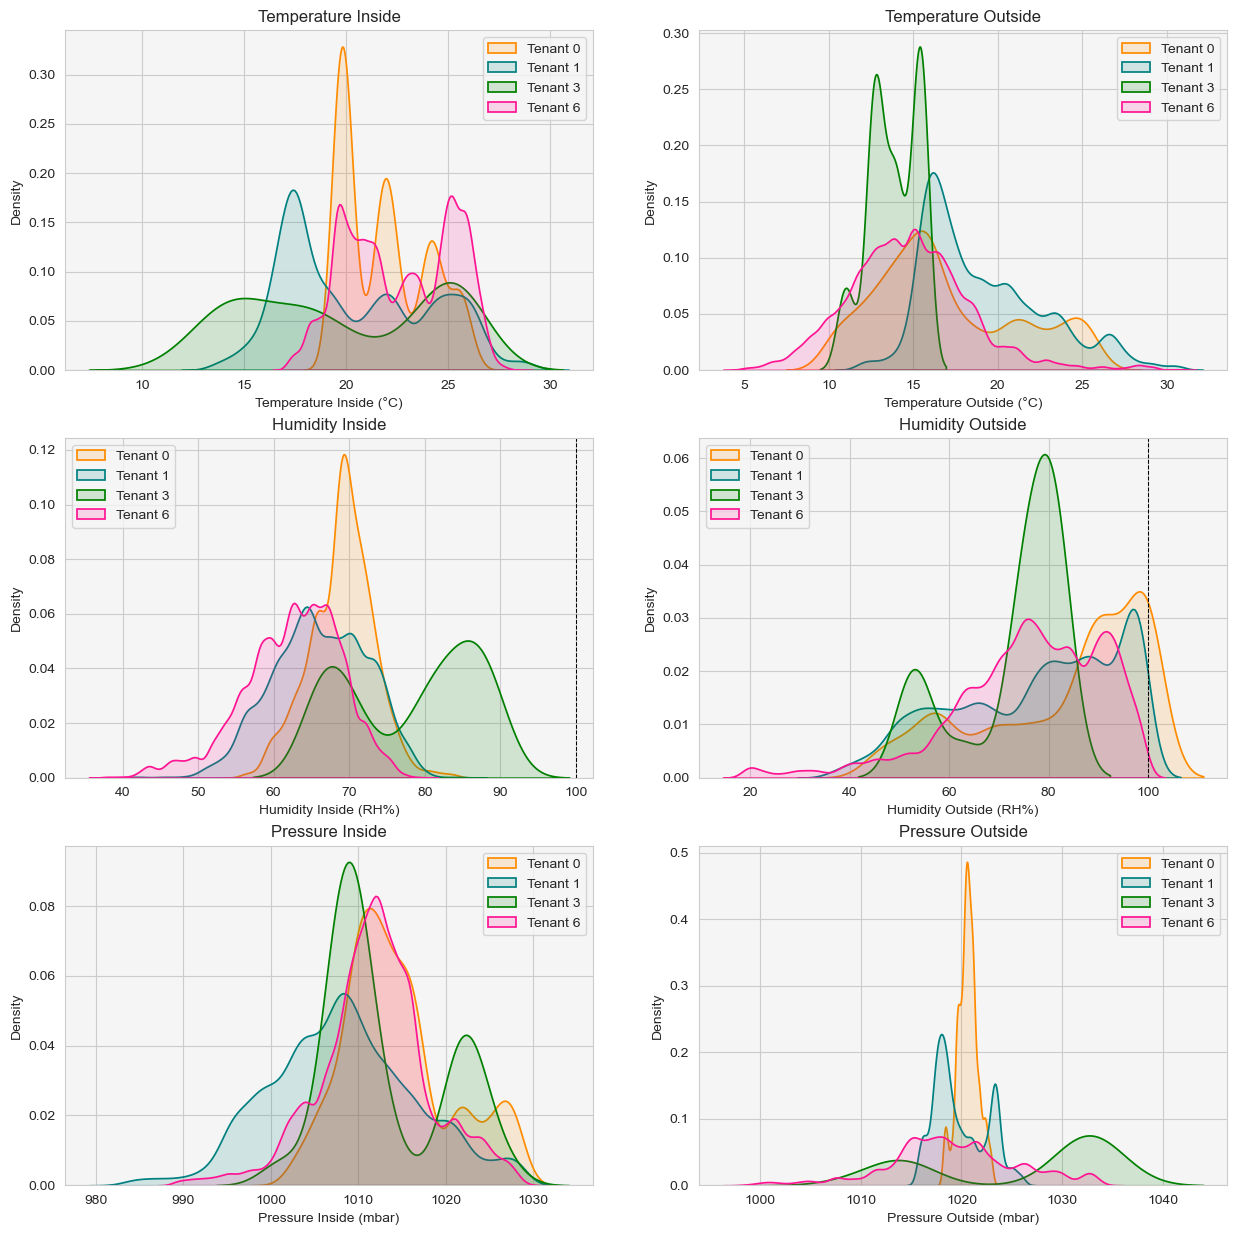

In [16]:
f.plot_var(thp_data)

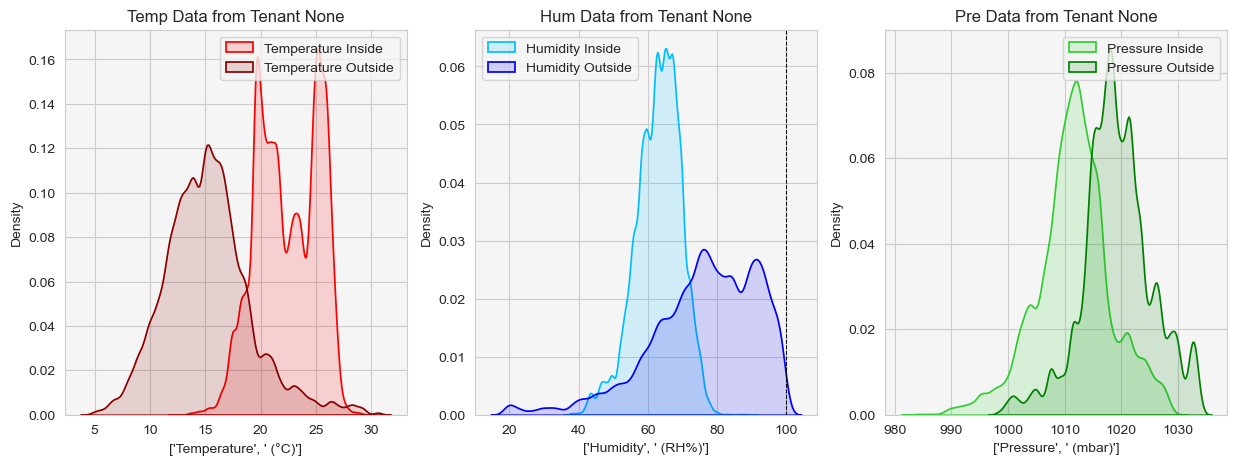

In [17]:
f.plot_in_vs_out(thp_data)

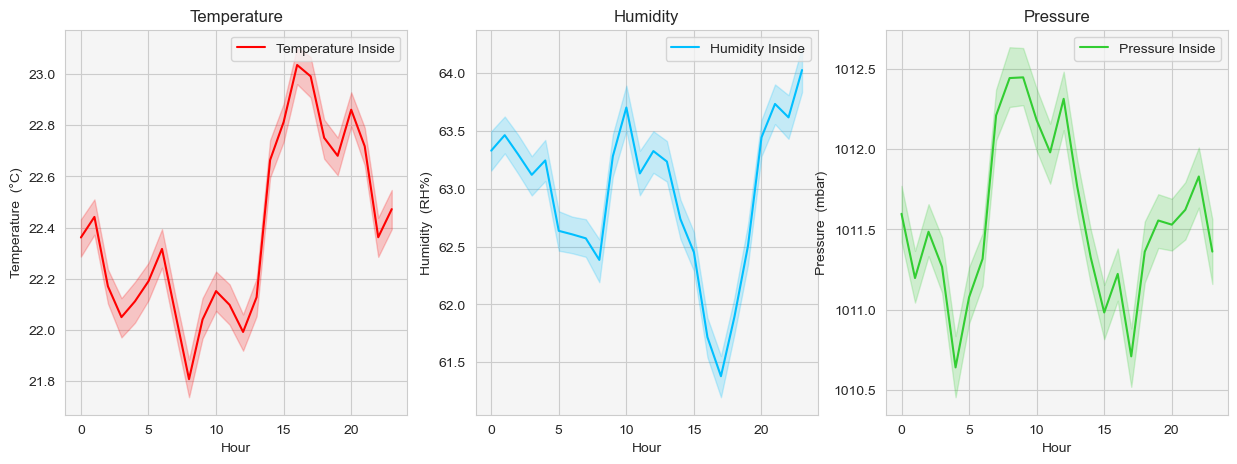

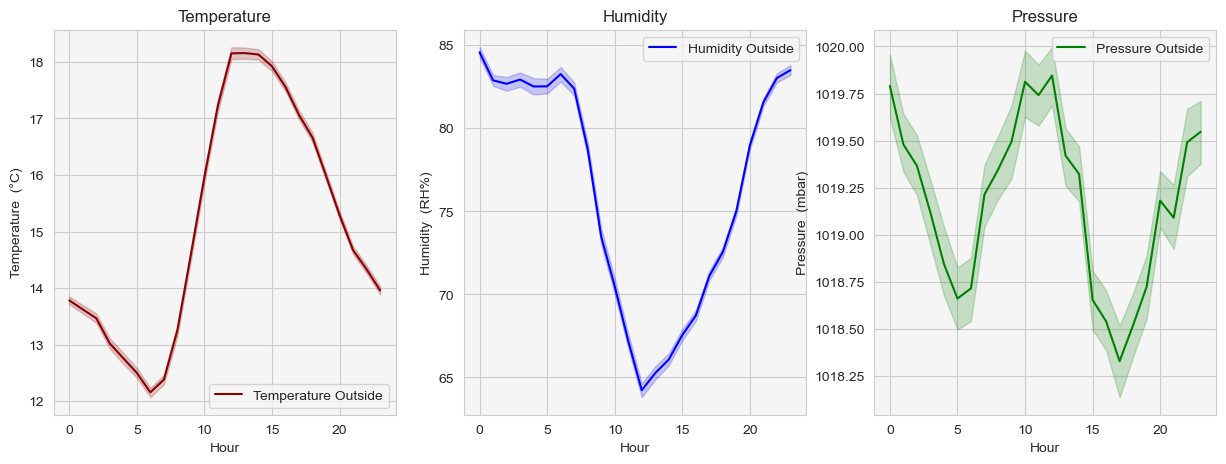

In [18]:
f.plot_mean(thp_data, 'hour', tenant=None, month=None)

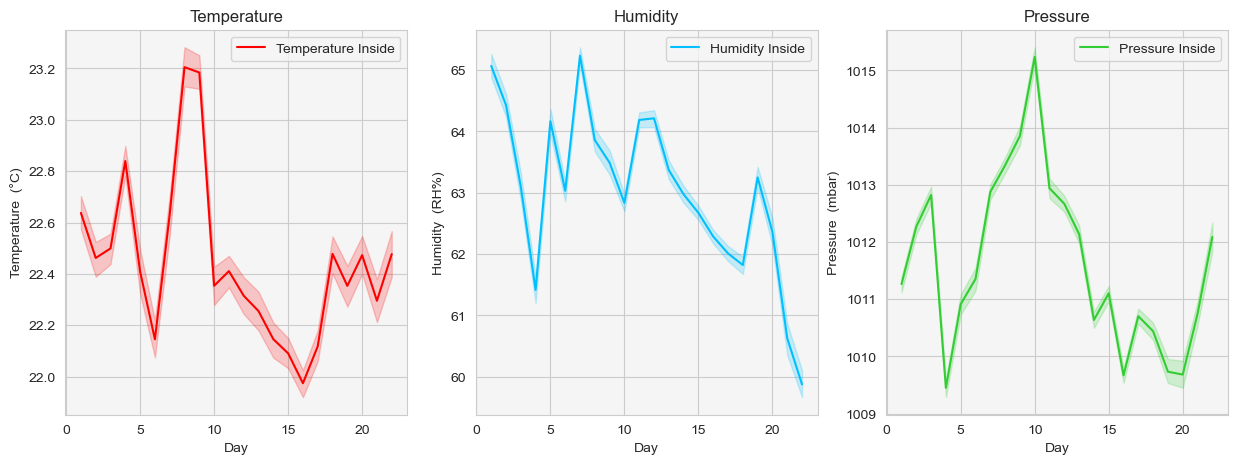

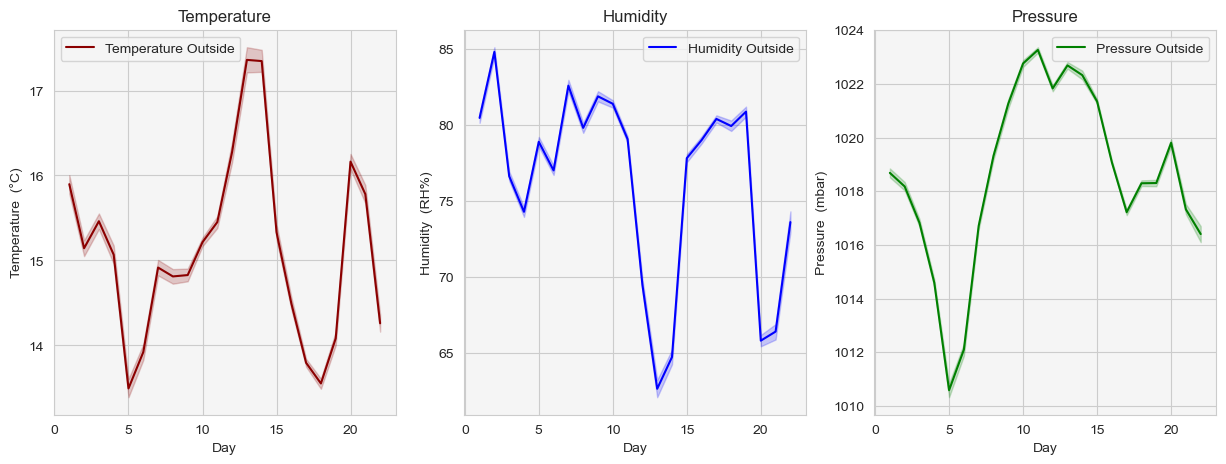

In [19]:
f.plot_mean(thp_data, 'day', tenant=None, month=None)

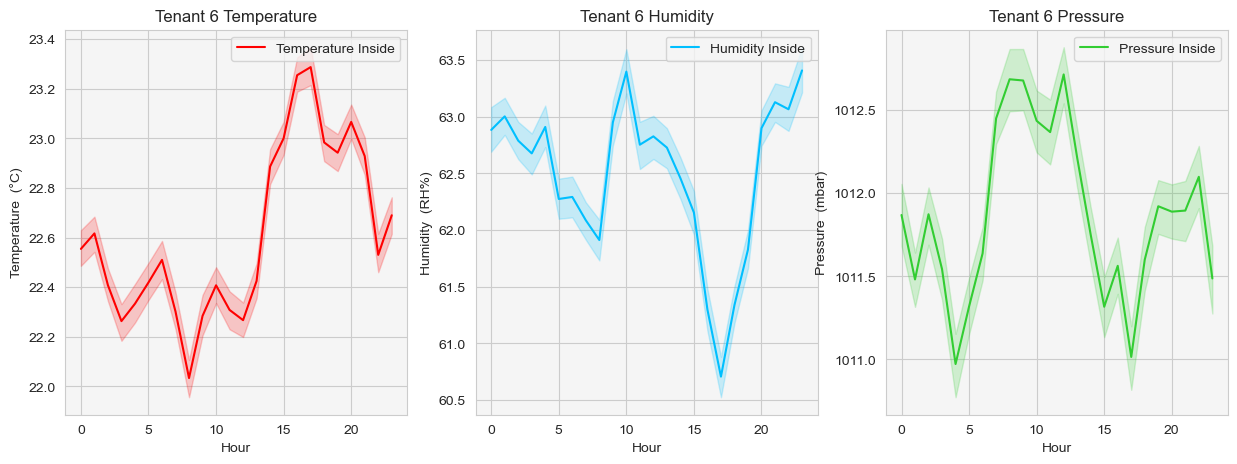

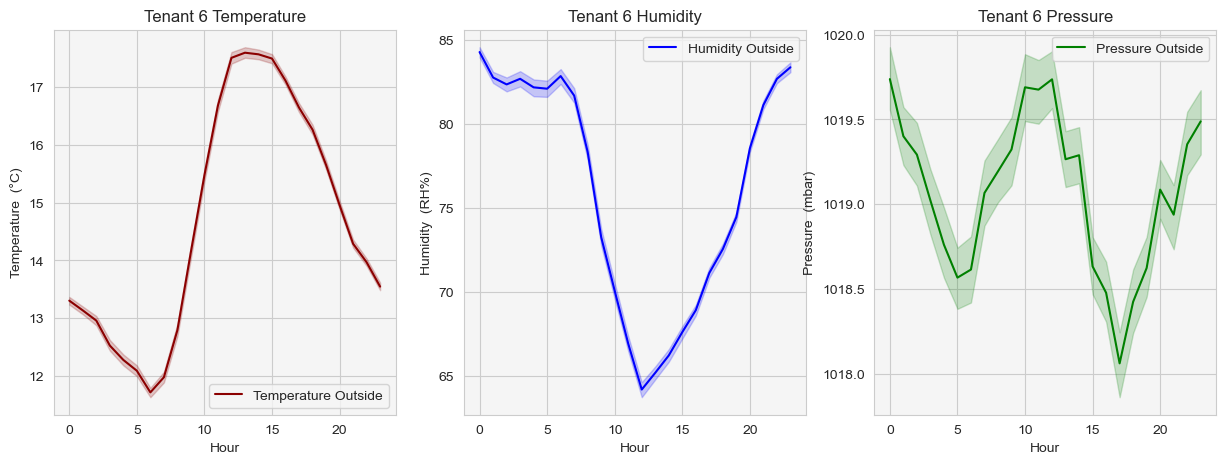

In [20]:
f.plot_mean(thp_data, 'hour', tenant=6, month=None)

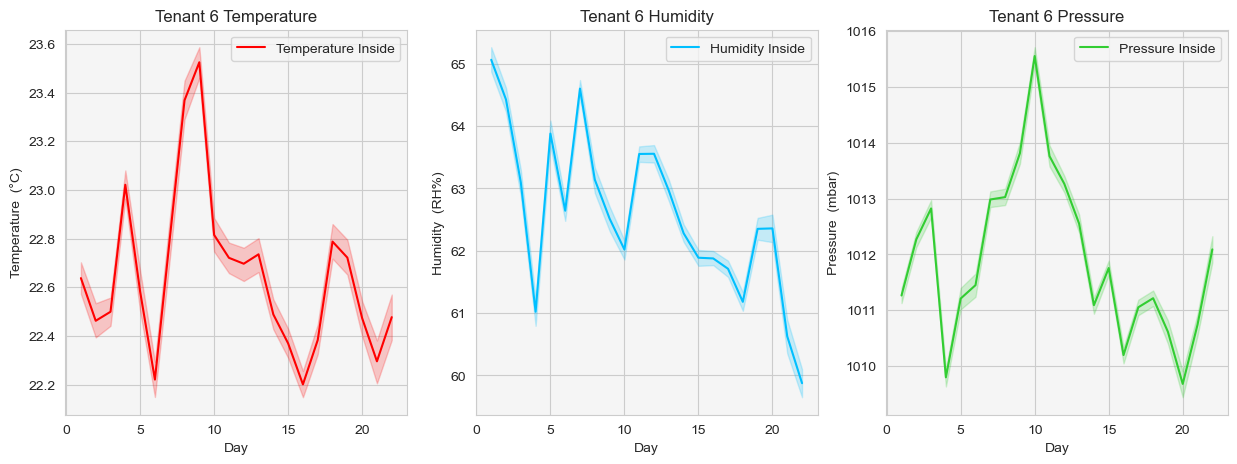

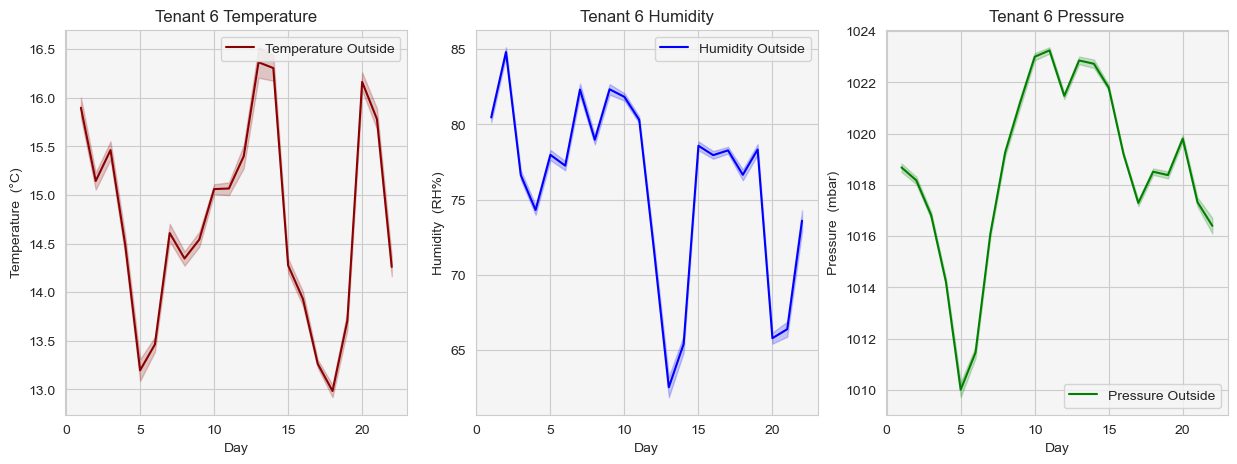

In [21]:
f.plot_mean(thp_data, 'day', tenant=6, month=None)

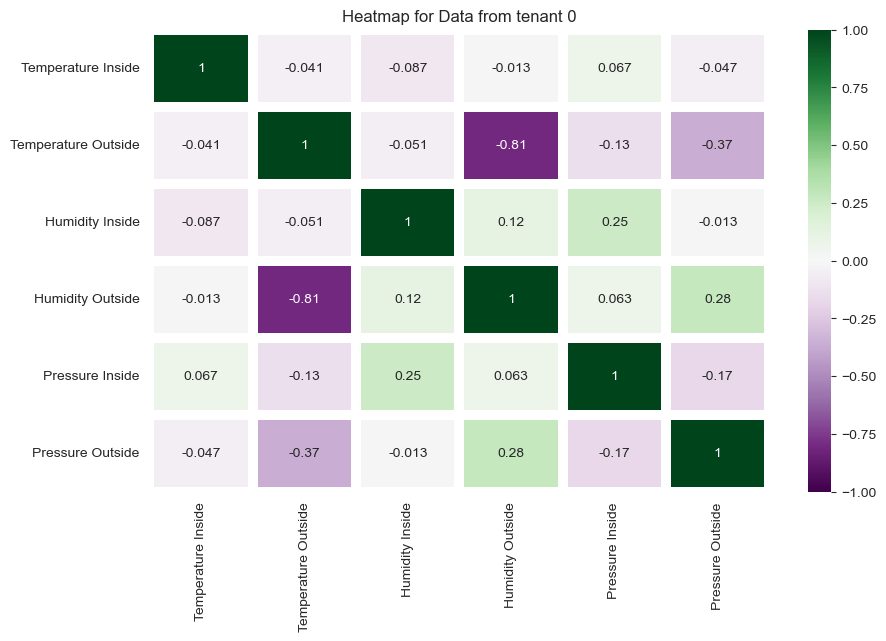

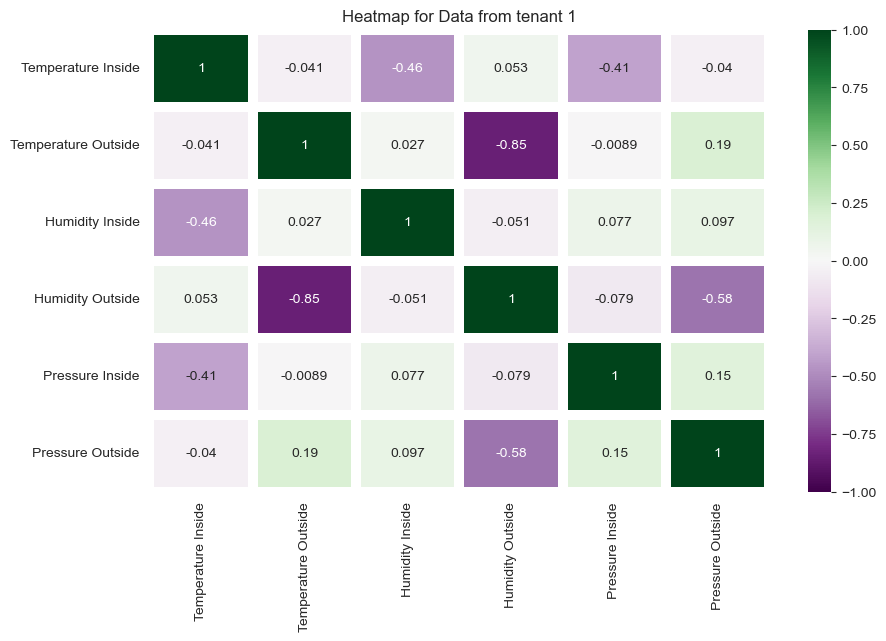

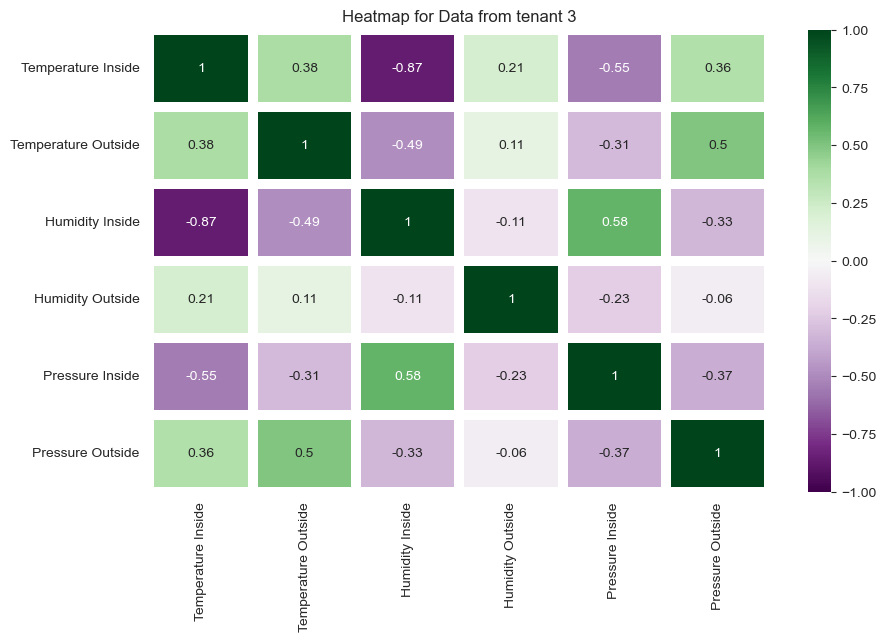

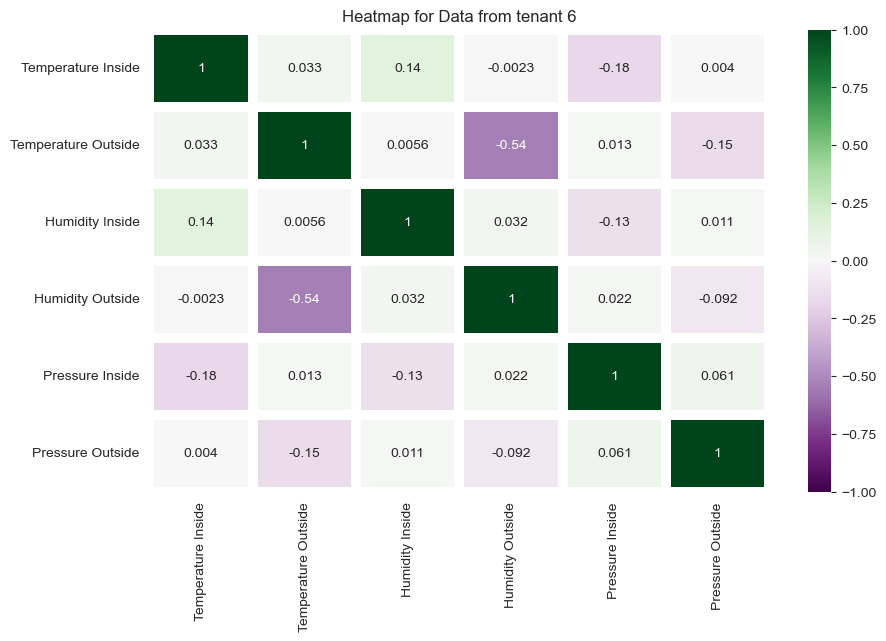

In [22]:
f.heat_map(thp_data)

-------

--------

## confort_thp Plots

In [23]:
confort_thp

,tenant_id,feedback,in_temp,in_hum,in_pre,out_temp,out_hum,out_pre,hour,date
0,0,comfortable,19.74,68.27,1004.00,25.4,55.0,1020.4,15,2019-10-06
1,0,comfortable,19.80,69.05,1004.12,25.4,55.0,1020.4,15,2019-10-06
2,0,comfortable,19.80,69.07,1004.12,25.4,55.0,1020.4,15,2019-10-06
3,0,comfortable,22.60,72.35,1012.80,25.4,55.0,1020.4,15,2019-10-06
4,0,comfortable,22.60,72.50,1012.80,25.4,55.0,1020.4,15,2019-10-06
...,...,...,...,...,...,...,...,...,...,...
1357,1,uncomfortable,19.43,75.34,1010.00,14.3,81.0,1021.5,7,2019-09-10
1358,1,uncomfortable,19.43,75.42,1010.00,14.3,81.0,1021.5,7,2019-09-10
1359,1,uncomfortable,19.36,75.42,1010.00,14.3,81.0,1021.5,7,2019-09-10
1360,1,uncomfortable,19.36,75.42,1010.50,14.3,81.0,1021.5,7,2019-09-10


In [24]:
df=confort_thp.groupby(['feedback']).mean().round(2)
df

,tenant_id,in_temp,in_hum,in_pre,out_temp,out_hum,out_pre,hour
feedback,,,,,,,,
comfortable,0.85,20.61,66.61,1009.10,20.16,72.95,1020.51,15.24
not home,0.00,22.99,68.91,1014.84,13.80,85.00,1021.20,21.00
uncomfortable,1.00,18.79,67.00,1013.84,14.30,81.00,1021.50,7.00


------

In [25]:
df=thp_data.groupby('tenant_id').mean().round(2)
df

,in_temp,out_temp,in_hum,out_hum,in_pre,out_pre,hour,day,month
tenant_id,,,,,,,,,
0,21.84,16.94,68.99,82.96,1014.44,1020.58,12.04,7.99,10.00
1,20.42,19.12,66.11,77.55,1008.25,1019.85,11.39,13.72,9.00
3,19.77,13.81,78.27,72.76,1012.99,1025.90,17.08,10.47,3.88
6,22.62,14.71,62.48,75.89,1011.87,1019.07,11.54,12.04,4.21


## contact_thp

In [26]:
contact_thp

,tenant_id,contact,in_temp,in_hum,in_pre,out_temp,out_hum,out_pre,mins,hour,date
0,0,0.0,21.46,65.35,1008.22,24.6,57.0,1020.9,0,14,2019-10-06
1,0,0.0,21.46,65.35,1008.22,24.6,57.0,1020.9,2,14,2019-10-06
2,0,0.0,21.46,65.35,1008.22,24.6,57.0,1020.9,4,14,2019-10-06
3,0,0.0,21.46,65.35,1008.22,24.6,57.0,1020.9,8,14,2019-10-06
4,0,0.0,21.46,65.35,1008.22,24.6,57.0,1020.9,11,14,2019-10-06
...,...,...,...,...,...,...,...,...,...,...,...
36403,6,1.0,22.80,62.77,1012.40,14.3,96.0,1023.3,56,13,2019-12-13
36404,6,1.0,22.80,62.77,1012.40,14.3,96.0,1023.3,57,13,2019-12-13
36405,6,1.0,22.80,62.77,1012.40,14.3,96.0,1023.3,57,13,2019-12-13
36406,6,1.0,22.80,62.77,1012.40,14.3,96.0,1023.3,58,13,2019-12-13


## presence_thp

In [27]:
presence_thp

,tenant_id,ill,occ,in_temp,in_hum,in_pre,out_temp,out_hum,out_pre,mins,hour,date
0,0,202.0,0.0,21.46,65.35,1008.22,24.6,57.0,1020.9,11,14,2019-10-06
1,0,202.0,0.0,21.46,65.35,1008.22,24.6,57.0,1020.9,12,14,2019-10-06
2,0,220.0,0.0,21.46,65.35,1008.22,24.6,57.0,1020.9,19,14,2019-10-06
3,0,0.0,0.0,21.46,65.35,1008.22,24.6,57.0,1020.9,0,14,2019-10-06
4,0,0.0,0.0,21.46,65.35,1008.22,24.6,57.0,1020.9,2,14,2019-10-06
...,...,...,...,...,...,...,...,...,...,...,...,...
31253,6,0.0,0.0,22.80,62.77,1012.40,14.3,96.0,1023.3,25,13,2019-12-13
31254,6,0.0,1.0,22.80,62.77,1012.40,14.3,96.0,1023.3,23,13,2019-12-13
31255,6,0.0,1.0,22.80,62.77,1012.40,14.3,96.0,1023.3,22,13,2019-12-13
31256,6,0.0,0.0,22.80,62.77,1012.40,14.3,96.0,1023.3,22,13,2019-12-13


# <center>MODELING

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df=thp_data.copy()

In [66]:
X=df.drop(['tenant_id', 'in_temp', 'date'], axis=1)
y=df['in_temp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mses=[]
r2s=[]

## Linear Regression

In [64]:
m,r=f.apply_lr(X_train, X_test, y_train, y_test)

mses.append(m)
r2s.append(r)

## Decision Tree Regressor

In [55]:
m,r=f.apply_dtr(X_train, X_test, y_train, y_test)

mses.append(m)
r2s.append(r)

MSE: 0.17
R²: 0.98


## Random Forest Regressor

In [56]:
m,r=f.apply_rfr(X_train, X_test, y_train, y_test)

mses.append(m)
r2s.append(r)

MSE: 0.09
R²: 0.99


In [60]:
f.folds(k, X, y)

R² scores: [0.23671132 0.9216261  0.93551999 0.91279772 0.75065053]
R² mean: 0.75
R² std: 0.27


In [61]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

param_dist = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11)
}

model = RandomForestRegressor()

random_search = RandomizedSearchCV(model, param_dist, n_iter=20, cv=5, scoring='r2', n_jobs=-1, random_state=42)

random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_

y_pred = best_model.predict(X_test)


/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

In [67]:
mse_best = mean_squared_error(y_test, y_pred)
r2_best = r2_score(y_test, y_pred)

print("MSE for best model:", mse_best.round(2))
print("R2 for best model:", r2_best.round(2))

MSE for best model: 0.17
R2 for best model: 0.98


We conclude that we could proceed to predict the missing values on the tables made on MySQL to then better see tendencies, correlations and predict the comfort conditions of the tenants.

-------

-------